In [1]:
import pandas as pd
df = pd.read_csv('P1training.csv', parse_dates=True, index_col=0)
print(df.head())

from sklearn.model_selection import KFold, train_test_split
# split into test and train sets
train, test = train_test_split(df, test_size=0.2, random_state=5)
print(train.head())
print(test.head())
print('n_train:',len(train))
print('n_test:',len(test))

                     Appliances  lights     T1       RH_1    T2       RH_2  \
date                                                                         
2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   
2016-01-11 17:50:00          50      40  19.89  46.026667  19.2  44.500000   

                        T3       RH_3         T4       RH_4    ...        T8  \
date                                                           ...             
2016-01-11 17:00:00  19.79  44.730000  19.000000  45.566667    ...      18.2   
2016-01-11 17:10:00  19.79  44.790000  19.000000  45.992500    ...      18.2   
2016-01-11 17:20:00  19.79  44.933333  18.926667  45.890000    ...      18.2   
2016-01-11 17:40:00  19.79  45.000000  18.890000  45.

In [2]:
#get list of predictor names
feat_cols = [col for col in df.columns if 'Appliances' not in col]

#dimensions
d = train.shape

#numper of instances
n = train.shape[0]

#number of input variables for regression
p = train.shape[1] - 1

print('We have n={} rows, {} columns, of which p={} explanatory variables'.format(n, d[1], p))

We have n=11842 rows, 26 columns, of which p=25 explanatory variables


In [3]:
#list of variables and their types
print(train.dtypes)

Appliances       int64
lights           int64
T1             float64
RH_1           float64
T2             float64
RH_2           float64
T3             float64
RH_3           float64
T4             float64
RH_4           float64
T5             float64
RH_5           float64
T6             float64
RH_6           float64
T7             float64
RH_7           float64
T8             float64
RH_8           float64
T9             float64
RH_9           float64
T_out          float64
Press_mm_hg    float64
RH_out         float64
Windspeed      float64
Visibility     float64
Tdewpoint      float64
dtype: object


In [4]:
# launching analysis
# regression using formula
import statsmodels.formula.api as smf

#instantiate model
model = smf.ols('Appliances ~ 1 + {}'.format(' + '.join(feat_cols)), data=train)

#fit the model
results = model.fit()

#detailed results
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Appliances   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     96.96
Date:                Sat, 15 Sep 2018   Prob (F-statistic):               0.00
Time:                        01:49:31   Log-Likelihood:                -70501.
No. Observations:               11842   AIC:                         1.411e+05
Df Residuals:                   11816   BIC:                         1.412e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      29.9799    121.261      0.247      0.805    -207.712     267.672
lights          1.9257      0.123     15.670      0.000       1.685       2.167
T1             -1.8391      2.366     -0.777      0.437      -6.476       2.798
RH_1           14.9043      0.853     17.468      0.000      13.232      16.577
T2            -16.6423      2.082     -7.995      0.000     -20.722     -12.562
RH_2          -13.2188      0.974    -13.577      0.000     -15.127     -11.310
T3             26.3952      1.348     19.577      0.000      23.752      29.038
RH_3            6.1066      0.871      7.014      0.000       4.400       7.813
T4             -3.2463      1.307     -2.484      0.013      -5.808      -0.685
RH_4           -1.0142      0.826     -1.228      0.220      -2.633       0.605
T5             -1.3305      1.506     -0.884      0.377      -4.282       1.621
RH_5            0.1621      0.112      1.449      0.147      -0.057       0.381
T6              6.6193      0.811      8.158      0.000       5.029       8.210
RH_6            0.3627      0.087      4.156      0.000       0.192       0.534
T7              1.4406      1.689      0.853      0.394      -1.871       4.752
RH_7           -1.8579      0.552     -3.364      0.001      -2.940      -0.775
T8              8.5407      1.233      6.928      0.000       6.124      10.957
RH_8           -4.5171      0.478     -9.452      0.000      -5.454      -3.580
T9            -15.4302      2.246     -6.870      0.000     -19.833     -11.027
RH_9           -1.2414      0.528     -2.353      0.019      -2.276      -0.207
T_out          -9.0354      1.985     -4.552      0.000     -12.926      -5.145
Press_mm_hg     0.1469      0.137      1.072      0.284      -0.122       0.415
RH_out         -1.0043      0.410     -2.452      0.014      -1.807      -0.201
Windspeed       1.6595      0.445      3.729      0.000       0.787       2.532
Visibility      0.1097      0.074      1.477      0.140      -0.036       0.255
Tdewpoint       4.8664      1.928      2.525      0.012       1.088       8.645
==============================================================================
Omnibus:                     8120.285   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           111119.213
Skew:                           3.209   Prob(JB):                         0.00
Kurtosis:                      16.565   Cond. No.                     1.09e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [5]:
pvalues = results.pvalues
print('pvalues {}\n'.format(pvalues))
p_dict = pvalues.to_dict()
pvalue_threshold = 0.05
for key, value in p_dict.items():
    if value >= pvalue_threshold:
        print('keys to remove',key)
        if key == 'Intercept':
            continue
        else:
            print('removing...')
            feat_cols.remove(key)
print(feat_cols)

pvalues Intercept      8.047314e-01
lights         8.660482e-55
T1             4.368998e-01
RH_1           1.768867e-67
T2             1.412645e-15
RH_2           1.132973e-41
T3             5.217096e-84
RH_3           2.440684e-12
T4             1.300245e-02
RH_4           2.195740e-01
T5             3.769296e-01
RH_5           1.474032e-01
T6             3.761757e-16
RH_6           3.263109e-05
T7             3.937773e-01
RH_7           7.704453e-04
T8             4.483491e-12
RH_8           3.930736e-21
T9             6.758716e-12
RH_9           1.865944e-02
T_out          5.361842e-06
Press_mm_hg    2.836675e-01
RH_out         1.422989e-02
Windspeed      1.932759e-04
Visibility     1.397345e-01
Tdewpoint      1.159754e-02
dtype: float64

keys to remove Intercept
keys to remove T1
removing...
keys to remove RH_4
removing...
keys to remove T5
removing...
keys to remove RH_5
removing...
keys to remove T7
removing...
keys to remove Press_mm_hg
removing...
keys to remove Visibility
remo

In [6]:
#run model again after removing variables that are not significant at 5% level
#instantiate model
model = smf.ols('Appliances ~ 1 + {}'.format(' + '.join(feat_cols)), data=train)

#fit the model
results = model.fit()

#detailed results
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Appliances   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     134.1
Date:                Sat, 15 Sep 2018   Prob (F-statistic):               0.00
Time:                        01:49:31   Log-Likelihood:                -70505.
No. Observations:               11842   AIC:                         1.410e+05
Df Residuals:                   11823   BIC:                         1.412e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    157.9315     45.242      3.491      0.000      69.249     246.614
lights         1.9059      0.121     15.725      0.000       1.668       2.143
RH_1          15.1571      0.747     20.295      0.000      13.693      16.621
T2           -18.6351      1.437    -12.972      0.000     -21.451     -15.819
RH_2         -14.0103      0.825    -16.984      0.000     -15.627     -12.393
T3            25.5838      1.201     21.293      0.000      23.229      27.939
RH_3           5.8982      0.849      6.944      0.000       4.233       7.563
T4            -2.7124      1.170     -2.319      0.020      -5.005      -0.420
T6             6.6713      0.763      8.745      0.000       5.176       8.167
RH_6           0.3336      0.085      3.915      0.000       0.167       0.501
RH_7          -1.9473      0.487     -4.002      0.000      -2.901      -0.994
T8             8.5680      1.039      8.243      0.000       6.530      10.606
RH_8          -4.6342      0.439    -10.562      0.000      -5.494      -3.774
T9           -15.1169      1.677     -9.012      0.000     -18.405     -11.829
RH_9          -1.1218      0.496     -2.261      0.024      -2.094      -0.149
T_out         -9.2610      1.936     -4.784      0.000     -13.055      -5.467
RH_out        -1.0442      0.405     -2.579      0.010      -1.838      -0.251
Windspeed      1.4292      0.425      3.362      0.001       0.596       2.262
Tdewpoint      4.9062      1.889      2.597      0.009       1.203       8.610
==============================================================================
Omnibus:                     8121.682   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           111226.760
Skew:                           3.210   Prob(JB):                         0.00
Kurtosis:                      16.572   Cond. No.                     7.80e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.8e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
pvalues = results.pvalues
print('pvalues {}\n'.format(pvalues))
p_dict = pvalues.to_dict()
pvalue_threshold = 0.05
for key, value in p_dict.items():
    if value >= pvalue_threshold:
        print('keys to remove',key)
        if key == 'Intercept':
            continue
        else:
            print('removing...')
            feat_cols.remove(key)
print(feat_cols)

pvalues Intercept    4.833567e-04
lights       3.691690e-55
RH_1         4.844382e-90
T2           3.215586e-38
RH_2         6.200217e-64
T3           9.230450e-99
RH_3         4.017233e-12
T4           2.041052e-02
T6           2.533329e-18
RH_6         9.090275e-05
RH_7         6.313916e-05
T8           1.863391e-16
RH_8         5.804951e-26
T9           2.322535e-19
RH_9         2.377634e-02
T_out        1.736534e-06
RH_out       9.910812e-03
Windspeed    7.749763e-04
Tdewpoint    9.422364e-03
dtype: float64

['lights', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'T6', 'RH_6', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'RH_out', 'Windspeed', 'Tdewpoint']


In [8]:
#run model again after removing variables that are not significant at 5% level
#instantiate model
model = smf.ols('Appliances ~ 1 + {}'.format(' + '.join(feat_cols)), data=train)

#fit the model
results = model.fit()

#detailed results
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Appliances   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     134.1
Date:                Sat, 15 Sep 2018   Prob (F-statistic):               0.00
Time:                        01:49:31   Log-Likelihood:                -70505.
No. Observations:               11842   AIC:                         1.410e+05
Df Residuals:                   11823   BIC:                         1.412e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    157.9315     45.242      3.491      0.000      69.249     246.614
lights         1.9059      0.121     15.725      0.000       1.668       2.143
RH_1          15.1571      0.747     20.295      0.000      13.693      16.621
T2           -18.6351      1.437    -12.972      0.000     -21.451     -15.819
RH_2         -14.0103      0.825    -16.984      0.000     -15.627     -12.393
T3            25.5838      1.201     21.293      0.000      23.229      27.939
RH_3           5.8982      0.849      6.944      0.000       4.233       7.563
T4            -2.7124      1.170     -2.319      0.020      -5.005      -0.420
T6             6.6713      0.763      8.745      0.000       5.176       8.167
RH_6           0.3336      0.085      3.915      0.000       0.167       0.501
RH_7          -1.9473      0.487     -4.002      0.000      -2.901      -0.994
T8             8.5680      1.039      8.243      0.000       6.530      10.606
RH_8          -4.6342      0.439    -10.562      0.000      -5.494      -3.774
T9           -15.1169      1.677     -9.012      0.000     -18.405     -11.829
RH_9          -1.1218      0.496     -2.261      0.024      -2.094      -0.149
T_out         -9.2610      1.936     -4.784      0.000     -13.055      -5.467
RH_out        -1.0442      0.405     -2.579      0.010      -1.838      -0.251
Windspeed      1.4292      0.425      3.362      0.001       0.596       2.262
Tdewpoint      4.9062      1.889      2.597      0.009       1.203       8.610
==============================================================================
Omnibus:                     8121.682   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           111226.760
Skew:                           3.210   Prob(JB):                         0.00
Kurtosis:                      16.572   Cond. No.                     7.80e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.8e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
pvalues = results.pvalues
print('pvalues {}\n'.format(pvalues))
p_dict = pvalues.to_dict()
pvalue_threshold = 0.05
for key, value in p_dict.items():
    if value >= pvalue_threshold:
        print('keys to remove',key)
        if key == 'Intercept':
            continue
        else:
            print('removing...')
            feat_cols.remove(key)
print(feat_cols)

pvalues Intercept    4.833567e-04
lights       3.691690e-55
RH_1         4.844382e-90
T2           3.215586e-38
RH_2         6.200217e-64
T3           9.230450e-99
RH_3         4.017233e-12
T4           2.041052e-02
T6           2.533329e-18
RH_6         9.090275e-05
RH_7         6.313916e-05
T8           1.863391e-16
RH_8         5.804951e-26
T9           2.322535e-19
RH_9         2.377634e-02
T_out        1.736534e-06
RH_out       9.910812e-03
Windspeed    7.749763e-04
Tdewpoint    9.422364e-03
dtype: float64

['lights', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'T6', 'RH_6', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'RH_out', 'Windspeed', 'Tdewpoint']


In [10]:
#estimated coefficients 
print(results.params) 

#R2 
print(results.rsquared) 

#calculating the F-statistic 
F = results.mse_model / results.mse_resid 
print(F) 

#F provided by the results object 
print(results.fvalue)

Intercept    157.931479
lights         1.905874
RH_1          15.157064
T2           -18.635087
RH_2         -14.010252
T3            25.583776
RH_3           5.898219
T4            -2.712397
T6             6.671289
RH_6           0.333599
RH_7          -1.947260
T8             8.567977
RH_8          -4.634210
T9           -15.116941
RH_9          -1.121827
T_out         -9.260957
RH_out        -1.044176
Windspeed      1.429242
Tdewpoint      4.906216
dtype: float64
0.16958460200131542
134.13626443221023
134.13626443221023


In [11]:
#This test checks if the observed skewness and kurtosis matching a normal distribution. 
#Jarque-Bera normality test
#a large J-B value indicates that errors are not normally distributed
#Samples from a normal distribution have an expected skewness of 0 
#and an expected excess kurtosis of 0 (which is the same as a kurtosis of 3)
import statsmodels.api as sm
JB, JBpv, skw, kurt = sm.stats.stattools.jarque_bera(results.resid)
print('JB:',JB)
print('JBpv:',JBpv)
print('Skewness:',skw)
print('Kurtosis:',kurt)

JB: 111226.75990442061
JBpv: 0.0
Skewness: 3.2099043363353834
Kurtosis: 16.57231104466812


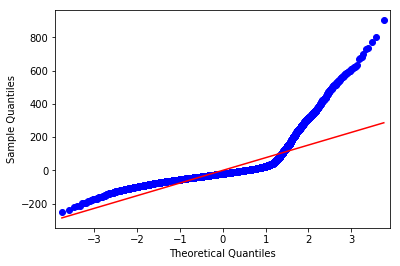

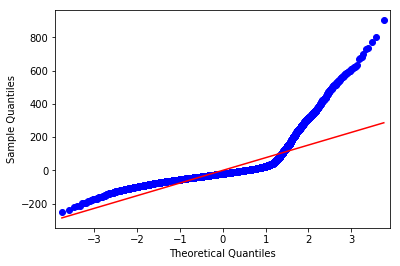

In [12]:
#Normal probability plot. 
#The normal probability plot is a graphical technique to identify substantive departures from normality. 
#It is based on the comparison between the observed distribution 
#and the theoretical distribution under the normal assumption. 
#The null hypothesis (normal distribution) is rejected if the points are not aligned on a straight line. 
#We use the qqplot() procedure.
import scipy.stats as stats
#qqpolot vs. normal distribution 
sm.qqplot(results.resid, stats.distributions.norm, line='r')

In [13]:
#Detection of outliers and influential points
influence = results.get_influence()

#determine leverage
print(influence.hat_matrix_diag)

[0.00317261 0.00195281 0.00230882 ... 0.00151462 0.00313917 0.00212462]


In [14]:
#internally studentized residuals
print(influence.resid_studentized_internal)

[ 0.39754044 -0.65552713 -0.54009346 ... -0.87285645 -0.9651998
 -0.54688332]


In [15]:
#checking the values of the internally studentized residuals
import numpy as np
residus = results.resid.values #residuals
leverages = influence.hat_matrix_diag #leverage
sigma_err = np.sqrt(results.scale) #regression standard error
res_stds = residus/(sigma_err*np.sqrt(1.0-leverages))
print(res_stds)

[ 0.39754044 -0.65552713 -0.54009346 ... -0.87285645 -0.9651998
 -0.54688332]


In [16]:
#checking externally studenized residuals with the formula
res_studs = res_stds*np.sqrt((n-p-2)/(n-p-1-res_stds**2))
print(res_studs)

[ 0.39752628 -0.65551131 -0.54007727 ... -0.87284766 -0.965197
 -0.5468671 ]


In [17]:
#threshold leverage
threshold_leverage = 2*(p+1)/n
print(threshold_leverage)
#identification
atypical_leverage = leverages > threshold_leverage
print(atypical_leverage)

0.004391150143556831
[False False False ... False False False]


In [19]:
#which variables?
print(train.index[atypical_leverage],leverages[atypical_leverage])

DatetimeIndex(['2016-04-20 17:40:00', '2016-05-05 15:40:00',
               '2016-04-10 09:00:00', '2016-03-13 18:00:00',
               '2016-04-20 18:30:00', '2016-03-25 19:20:00',
               '2016-05-08 20:00:00', '2016-05-05 13:20:00',
               '2016-02-08 18:40:00', '2016-05-05 17:20:00',
               ...
               '2016-05-05 14:20:00', '2016-03-08 19:00:00',
               '2016-05-05 13:30:00', '2016-01-21 19:30:00',
               '2016-05-07 13:20:00', '2016-02-20 18:50:00',
               '2016-03-02 19:20:00', '2016-01-18 21:20:00',
               '2016-03-25 19:40:00', '2016-01-15 01:40:00'],
              dtype='datetime64[ns]', name='date', length=151, freq=None) [0.00547014 0.00540279 0.00491585 0.00530975 0.00569711 0.00741864
 0.0065169  0.00495342 0.0058602  0.00564505 0.0053284  0.01276373
 0.00540426 0.00457658 0.00460361 0.00586373 0.01101107 0.01238317
 0.00439672 0.00644659 0.00570112 0.00453853 0.00720688 0.00566706
 0.00558871 0.00696677 0.004

In [21]:
#threshold externally studentized residuals
import scipy
threshold_stud = scipy.stats.t.ppf(0.975,df=n-p-2)
print(threshold_stud)
#detection - absolute value > threshold
atypical_stud = np.abs(res_studs) > threshold_stud
#which ones?
print(train.index[atypical_stud],res_studs[atypical_stud])

1.9601647894608945
DatetimeIndex(['2016-03-14 16:40:00', '2016-03-25 11:30:00',
               '2016-01-14 10:40:00', '2016-05-01 16:50:00',
               '2016-02-08 18:20:00', '2016-04-24 09:40:00',
               '2016-01-31 09:20:00', '2016-01-23 17:20:00',
               '2016-05-19 17:50:00', '2016-02-22 11:10:00',
               ...
               '2016-05-08 08:20:00', '2016-03-10 18:20:00',
               '2016-01-18 21:20:00', '2016-02-14 09:00:00',
               '2016-05-12 17:40:00', '2016-02-22 11:20:00',
               '2016-02-26 08:50:00', '2016-03-21 06:40:00',
               '2016-05-06 07:30:00', '2016-02-15 19:40:00'],
              dtype='datetime64[ns]', name='date', length=647, freq=None) [ 3.73099928  3.97877064  5.24041871  2.46414514  2.48190658  2.58809988
  2.30676203  3.08431619  4.18600436  2.97896327  3.91253027  5.30779193
  2.42756057  2.63726241  6.00566593  7.17438466  5.68467443  3.41720875
  3.38778753  3.14937428  2.74714284  3.10041198  3.042901

In [22]:
#Combination of leverage and externally studentized residuals
#suspicious observations with one of the two criteria
pbm_infl = np.logical_or(atypical_leverage,atypical_stud)
print(train.index[pbm_infl])

DatetimeIndex(['2016-03-14 16:40:00', '2016-03-25 11:30:00',
               '2016-01-14 10:40:00', '2016-05-01 16:50:00',
               '2016-02-08 18:20:00', '2016-04-24 09:40:00',
               '2016-01-31 09:20:00', '2016-01-23 17:20:00',
               '2016-05-19 17:50:00', '2016-02-22 11:10:00',
               ...
               '2016-01-18 21:20:00', '2016-02-14 09:00:00',
               '2016-05-12 17:40:00', '2016-02-22 11:20:00',
               '2016-02-26 08:50:00', '2016-03-21 06:40:00',
               '2016-03-25 19:40:00', '2016-01-15 01:40:00',
               '2016-05-06 07:30:00', '2016-02-15 19:40:00'],
              dtype='datetime64[ns]', name='date', length=782, freq=None)


In [23]:
#Multi-collinearity problem
#correlation matrix 
import scipy
df_exog = train[feat_cols]
mc = scipy.corrcoef(df_exog,rowvar=0) 
print(mc)
# Correlation matrix. 
# A rule of thumb is to compare the absolute value of the correlation between 
# each pair of variables with the threshold value 0.8.

[[ 1.          0.11857656 -0.01556019  0.06526041 -0.10294882  0.14429466
  -0.01697123 -0.08318618  0.16915689  0.04155257 -0.08148066  0.02119761
  -0.16727147 -0.00144715 -0.07781576  0.07928432  0.06355571 -0.0329626 ]
 [ 0.11857656  1.          0.27499709  0.79695631  0.25963628  0.84562952
   0.11376123  0.31964652  0.244623    0.80126349 -0.0232897   0.73568714
   0.12123353  0.76407197  0.34610301  0.27544846  0.20090883  0.64218479]
 [-0.01556019  0.27499709  1.         -0.1593298   0.73590166  0.12532848
   0.76192418  0.80200574 -0.57690655  0.23452227  0.575788    0.07303311
   0.67519596  0.16195438  0.79235887 -0.50045811  0.05238156  0.58404122]
 [ 0.06526041  0.79695631 -0.1593298   1.          0.14397704  0.68025888
  -0.03994496 -0.00433016  0.38825917  0.68977657 -0.03249707  0.67781802
   0.06124096  0.67631035  0.04145162  0.58228953  0.06872407  0.50301915]
 [-0.10294882  0.25963628  0.73590166  0.14397704  1.         -0.00480208
   0.85055912  0.69053222 -0.64318

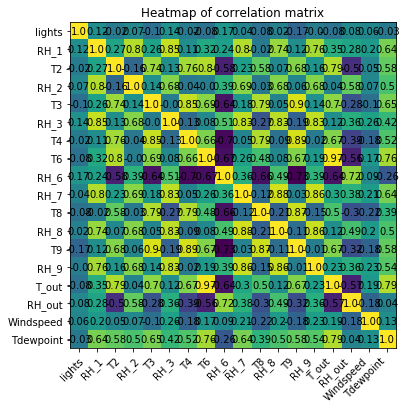

In [24]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.imshow(mc)
ax.set_title('Heatmap of correlation matrix')
# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
rotation_mode="anchor")
# We want to show all ticks...
ax.set_xticks(np.arange(len(feat_cols)))
ax.set_yticks(np.arange(len(feat_cols)))
# ... and label them with the respective list entries
ax.set_xticklabels(feat_cols)
ax.set_yticklabels(feat_cols)
# Loop over data dimensions and create text annotations.
for i in range(len(feat_cols)):
    for j in range(len(feat_cols)):
        text = ax.text(j, i, round(mc[i, j], 2),
        ha="center", va="center", color="black")
plt.show()

In [25]:
# Klein’s rule of thumb 
# Klein’s rule of thumb. It consists in comparing the square of the correlation between the pairs
# of predictors with the overall R2 (R² = 0.169) of the regression. 
# It is interesting because it takes into account the characteristics of the regression.

mc2 = mc**2 
print(mc2)

[[1.00000000e+00 1.40603999e-02 2.42119609e-04 4.25892074e-03
  1.05984600e-02 2.08209482e-02 2.88022597e-04 6.91993979e-03
  2.86140534e-02 1.72661592e-03 6.63909722e-03 4.49338512e-04
  2.79797448e-02 2.09423147e-06 6.05529299e-03 6.28600266e-03
  4.03932865e-03 1.08653309e-03]
 [1.40603999e-02 1.00000000e+00 7.56234004e-02 6.35139354e-01
  6.74109976e-02 7.15089281e-01 1.29416177e-02 1.02173896e-01
  5.98404136e-02 6.42023188e-01 5.42409920e-04 5.41235570e-01
  1.46975689e-02 5.83805979e-01 1.19787290e-01 7.58718531e-02
  4.03643586e-02 4.12401305e-01]
 [2.42119609e-04 7.56234004e-02 1.00000000e+00 2.53859867e-02
  5.41551247e-01 1.57072275e-02 5.80528455e-01 6.43213201e-01
  3.32821162e-01 5.50006942e-02 3.31531826e-01 5.33383546e-03
  4.55889581e-01 2.62292220e-02 6.27832583e-01 2.50458323e-01
  2.74382767e-03 3.41104145e-01]
 [4.25892074e-03 6.35139354e-01 2.53859867e-02 1.00000000e+00
  2.07293874e-02 4.62752150e-01 1.59559979e-03 1.87503005e-05
  1.50745184e-01 4.75791714e-01 1

In [26]:
#VIF criterion 
#A possible rule for multicollinearity detection is (VIF > 4). 

vif = np.linalg.inv(mc) 
print(vif)

[[ 1.26020517e+00 -2.88630494e-01  3.78701215e-02 -4.02618657e-02
  -9.16209831e-03 -1.83986358e-01 -8.89475493e-01 -2.68088130e-01
  -2.55499601e-01  6.15444645e-02 -3.37143150e-01  4.28512977e-01
   1.19990769e+00  1.78106939e-01  1.79134438e-01 -1.54969005e-01
  -1.17046579e-01 -1.26991046e-01]
 [-2.88630494e-01  1.19677875e+01 -5.95658867e+00 -9.26286334e+00
   1.14405715e+00 -3.66041722e+00  9.92215020e-01 -2.76417506e+00
  -2.06678730e-01  7.78372119e-01  1.38818163e+00 -5.19679903e-01
  -1.04391791e-01  6.97952700e-01  6.05431621e+00  3.45601336e+00
   2.07248799e-01 -3.28959667e+00]
 [ 3.78701215e-02 -5.95658867e+00  1.34159561e+01  1.10354224e+01
  -2.99790342e+00 -3.33767410e+00 -3.22930378e+00 -3.98684471e+00
  -1.13846112e+00 -1.86742263e+00 -2.19712142e+00  9.13166700e-01
  -7.12457358e-01 -3.94795178e-02  1.79671760e+00  3.66952523e-02
  -7.63930340e-02 -1.14873997e+00]
 [-4.02618657e-02 -9.26286334e+00  1.10354224e+01  1.52721714e+01
  -2.35763197e+00 -2.25851689e+00 -1.

In [44]:
## Making predictions
## https://ec.europa.eu/eurostat/statistics-explained/index.php/Glossary:In-sample_vs._out-of-sample_forecasts
## Punctual Predictions (out-of-sample prediction)
#no. of instances
n_pred = test.shape[0]
#predictor columns
test_exog = test[feat_cols]
#add a column of 1
test_exog = sm.add_constant(test_exog)
print(test_exog)

                     const  lights       RH_1         T2       RH_2  \
date                                                                  
2016-02-23 23:30:00    1.0       0  41.090000  19.790000  41.026667   
2016-02-07 12:10:00    1.0       0  44.526667  20.500000  42.663333   
2016-05-02 17:30:00    1.0      10  37.200000  23.066667  33.626667   
2016-05-03 12:00:00    1.0       0  38.626667  25.533333  31.600000   
2016-01-20 11:00:00    1.0       0  36.900000  16.790000  37.826667   
2016-01-30 04:10:00    1.0       0  44.090000  18.600000  43.760000   
2016-04-12 13:30:00    1.0       0  41.900000  24.260000  36.760000   
2016-01-17 13:00:00    1.0       0  38.060000  21.290000  36.590000   
2016-03-23 08:40:00    1.0      10  39.826667  18.890000  43.900000   
2016-04-28 21:30:00    1.0       0  33.500000  18.963333  33.933333   
2016-04-12 20:40:00    1.0      10  43.500000  21.323333  42.826667   
2016-01-16 09:10:00    1.0       0  42.100000  20.926667  40.790000   
2016-0

In [28]:
#punctual prediction by applying the regression coefficients
y_pred = model.predict(results.params,test_exog)
print(y_pred)

[ 57.00206986 113.7053297  140.6471071  ...  93.88429662 144.12191035
  69.54820036]


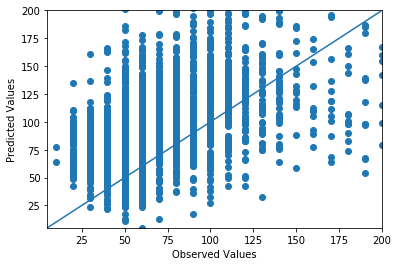

In [30]:
#comparison obs. Vs. pred.
plt.scatter(test['Appliances'],y_pred)
plt.plot(np.arange(5,200),np.arange(5,200))
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.xlim(5,200)
plt.ylim(5,200)
plt.show()

In [31]:
## checking MSE
from sklearn.metrics import (accuracy_score, mean_absolute_error,
                             mean_squared_error, r2_score)
print('MAE:', mean_absolute_error(test['Appliances'], y_pred))
print('RMSE:', np.sqrt(mean_squared_error(test['Appliances'], y_pred)))
print('R-Squared:', r2_score(test['Appliances'], y_pred))

MAE: 53.373658690688444
RMSE: 95.92486127012205
R-Squared: 0.16433873833607004



CHECKING RESIDUALS



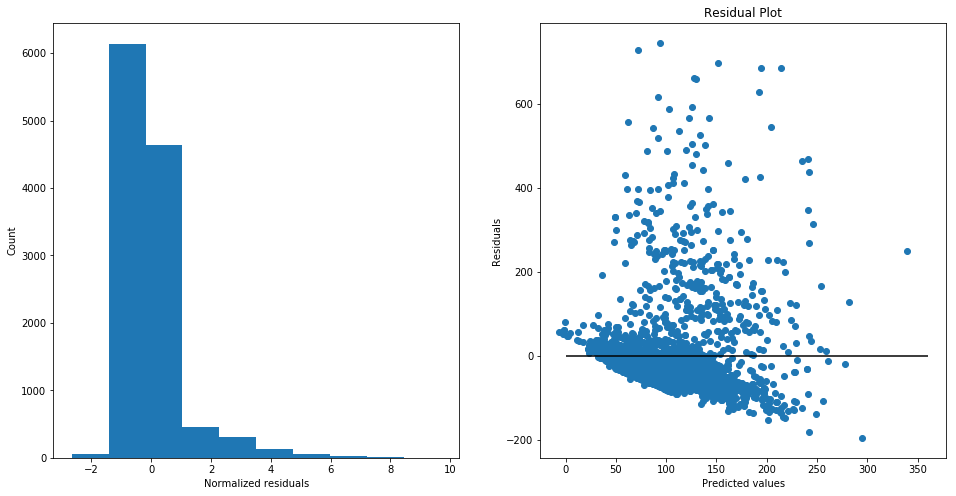

In [39]:
print('\nCHECKING RESIDUALS\n')
residual = test['Appliances'] - y_pred
fig, ax = plt.subplots(1,2, figsize=(16,8))
# axes are in a two-dimensional array, indexed by [row, col]
ax[0].hist(results.resid_pearson)
ax[0].set_ylabel('Count')
ax[0].set_xlabel('Normalized residuals')
ax[1].scatter(y_pred, residual)
ax[1].set_title('Residual Plot')
ax[1].set_xlabel('Predicted values')
ax[1].set_ylabel('Residuals')
ax[1].hlines(y = 0, xmin = 0, xmax = 360)


In [40]:
## Standard error of the prediction
# prediction interval
#retrieving the matrix (X'X)-1 
inv_xtx = model.normalized_cov_params 
print(inv_xtx)

[[ 2.35197822e-01  2.09590063e-05  1.00237662e-04 -9.48591182e-04
  -8.82714355e-04  3.71982607e-04 -6.44719613e-04 -3.18140329e-04
  -1.41940262e-04  7.97141808e-05  1.71086651e-04 -4.95552526e-04
   9.22332490e-05 -8.58998092e-05 -4.79854159e-05 -7.15886930e-03
  -1.70080031e-03 -6.42117129e-04  8.51683256e-03]
 [ 2.09590063e-05  1.68792892e-06 -7.73024818e-07  1.84263469e-07
  -1.05435172e-07 -4.85270811e-08 -6.03019781e-07 -4.64299424e-06
  -4.68036194e-07 -8.71699277e-08  1.27956448e-07 -1.83313580e-06
   8.70211947e-07  6.32889694e-06  4.56499736e-07  3.58521337e-07
  -1.10551649e-07 -5.10513668e-07 -3.20760328e-07]
 [ 1.00237662e-04 -7.73024818e-07  6.40919402e-05 -5.79533415e-05
  -4.85037366e-05  1.21164464e-05 -2.39891496e-05  1.03563872e-05
  -9.64952028e-06 -1.40997227e-07  3.23592745e-06  1.50926297e-05
  -2.11025682e-06 -1.10099377e-06  3.57704175e-06  2.42292152e-05
   4.92985470e-06  1.80750288e-06 -1.66145478e-05]
 [-9.48591182e-04  1.84263469e-07 -5.79533415e-05  2.37

In [43]:
#description of the new instances: transformation in matrix 
X_pred = test_exog.values

In [46]:
#### squared value of the standard error of the prediction 
### 
#initialization 
var_err = np.zeros((n_pred,)) 
#for each individual to process 
for i in range(n_pred): 
    #description of the individual 
    tmp = X_pred[i,:] 
    #matrix product 
    pm = np.dot(np.dot(tmp,inv_xtx),np.transpose(tmp)) 
    #squared values 
    var_err[i] = results.scale * (1 + pm) # 
print(var_err)

[8711.04198094 8713.89515552 8714.16818282 ... 8709.35351401 8715.01349826
 8708.64805646]


In [47]:
## Confidence interval. Now we calculate the lower and upper bounds for a 95% confidence level, 
## using the quantile of the Student distribution and the punctual prediction
#quantile of the Student distribution (0.975) 
qt = scipy.stats.t.ppf(0.975,df=n-p-1) 
#lower bound 
y_low = y_pred - qt * np.sqrt(var_err) 
print(y_low) 
#upper bound 
y_high = y_pred + qt * np.sqrt(var_err) 
print(y_high)

[-125.94591631  -69.27261499  -42.33370413 ...  -89.04595822  -38.86777567
 -113.37464566]
[239.95005603 296.68327438 323.62791833 ... 276.81455147 327.11159637
 252.47104638]


In [54]:
#matrix with the various values (lower bound, observed, upper bound) 
a = np.resize(y_low,new_shape=(n_pred,1)) 
y_obs = test['Appliances'] 
a = np.append(a,np.resize(y_obs,new_shape=(n_pred,1)),axis=1) 
a = np.append(a,np.resize(y_high,new_shape=(n_pred,1)),axis=1) 
#transforming in a data frame object to obtain better displaying 
display_df = pd.DataFrame(a) 
display_df.index = test.index 
display_df.columns = ['Lower bound','Y.Obs','Upper bound'] 
print(display_df)

                     Lower bound  Y.Obs  Upper bound
date                                                
2016-02-23 23:30:00  -125.945916   50.0   239.950056
2016-02-07 12:10:00   -69.272615   40.0   296.683274
2016-05-02 17:30:00   -42.333704  240.0   323.627918
2016-05-03 12:00:00   -68.684084   50.0   297.362386
2016-01-20 11:00:00   -95.560706   90.0   270.363940
2016-01-30 04:10:00   -99.657567   20.0   266.358744
2016-04-12 13:30:00   -65.438120   60.0   300.460301
2016-01-17 13:00:00   -99.230024  120.0   266.965606
2016-03-23 08:40:00  -116.124252   80.0   249.733595
2016-04-28 21:30:00   -42.586340   50.0   323.586027
2016-04-12 20:40:00    14.781801  310.0   381.060182
2016-01-16 09:10:00  -156.168981   60.0   209.812485
2016-03-31 07:50:00   -92.026489   70.0   273.924832
2016-02-25 13:20:00    39.677558  350.0   406.035580
2016-05-24 05:40:00  -119.463490  340.0   246.476940
2016-02-03 17:10:00    77.395332  250.0   443.873859
2016-05-24 20:20:00   -68.743715   90.0   297.

In [51]:
display_df.dtypes

Lower bound    float64
Y.Obs          float64
Upper Bound    float64
dtype: object

In [58]:
# get list of rows which exceed bounds
# instantiate list to store indexes
list_of_idx = []
for index, row in display_df.iterrows():
    if row['Y.Obs'] < row['Lower bound'] or row['Y.Obs'] > row['Upper bound']:
        list_of_idx.append(index)
for counter, value in enumerate(list_of_idx):
    print(counter, value)

0 2016-05-24 05:40:00
1 2016-02-19 09:00:00
2 2016-04-01 10:20:00
3 2016-02-03 12:00:00
4 2016-04-16 09:10:00
5 2016-02-08 13:30:00
6 2016-05-13 16:00:00
7 2016-05-13 08:00:00
8 2016-01-26 20:50:00
9 2016-05-23 17:40:00
10 2016-02-11 18:00:00
11 2016-04-16 16:30:00
12 2016-05-22 11:00:00
13 2016-01-11 19:00:00
14 2016-05-27 09:40:00
15 2016-03-11 19:00:00
16 2016-03-07 08:30:00
17 2016-04-19 17:40:00
18 2016-02-11 08:50:00
19 2016-03-25 13:10:00
20 2016-03-07 10:10:00
21 2016-01-15 18:50:00
22 2016-04-16 10:40:00
23 2016-02-22 09:20:00
24 2016-02-29 18:20:00
25 2016-04-04 15:40:00
26 2016-01-17 17:40:00
27 2016-02-29 12:30:00
28 2016-05-13 14:30:00
29 2016-03-26 10:30:00
30 2016-02-08 12:20:00
31 2016-04-12 18:40:00
32 2016-02-12 14:00:00
33 2016-01-14 10:00:00
34 2016-03-03 13:20:00
35 2016-02-01 11:30:00
36 2016-01-25 20:10:00
37 2016-04-09 18:40:00
38 2016-02-13 11:40:00
39 2016-02-18 11:10:00
40 2016-01-31 12:40:00
41 2016-01-16 18:10:00
42 2016-05-09 17:30:00
43 2016-03-14 18:30:0

In [ ]:
#Other criteria for detecting influential points
## can't seemto run this
## print(influence.summary_frame().filter(["hat_diag","student_resid","dffits","cooks_d"]))

In [ ]:
#graphical representation of the influences()
## sm.graphics.influence_plot(results)
## can't seem to run this